# Assignment 1 (20 marks)

Letter Image Recognition

In this assignment you are given a large number of black-and-white rectangular pixel displays. You will use neural networks (MLP) and KNN in order to predict which of the 26 capital letters in the English alphabet each such display represents.

### A: Source Information

Creator: David J. Slate Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201  
Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867  
Date: January, 1991  


### B: Relevant Information

The character images is based on 20 different fonts and each letter within these 20 fonts has been randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000 (**NOT in this assignment**). See the article cited below for more details: 

P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91): "Letter Recognition Using Holland-style Adaptive Classifiers".

### C:Attribute Information

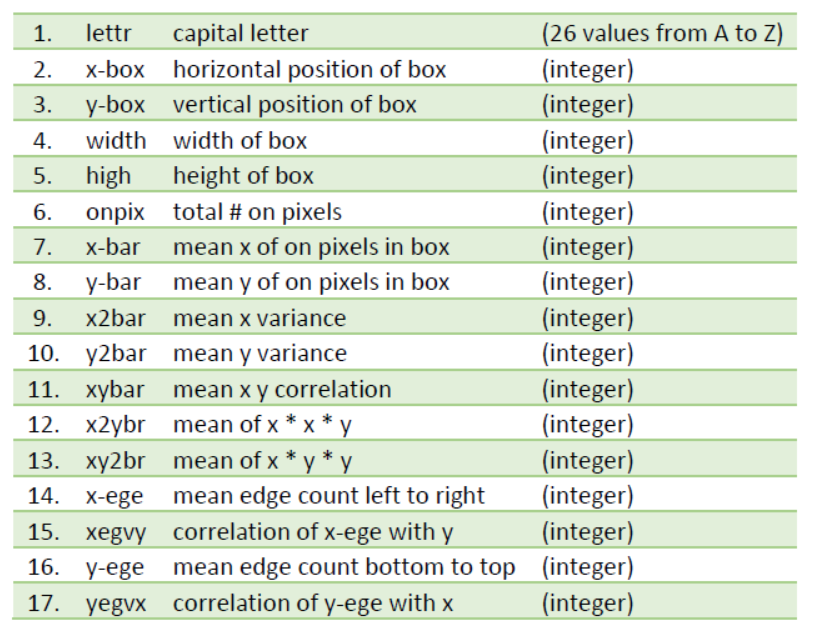

In [1]:
from IPython.display import Image
Image(filename='Att_Letter.png',width = "600",height = "300")

**Note**: In the above table, the class label is the **'lettr'** (No.1), following by the 16 numerical attributes (Nos. 2-17).

The following code uses Python's `csv` module to load the data and prints the first row and the total number of rows.

In [2]:
import sklearn
import csv

In [3]:
with open('Letter.csv') as f:
    reader = csv.reader(f)
    print("Header line: %s" % next(reader))
    annotated_data = [r for r in reader]
print(annotated_data[0])
print("Total number of rows:", len(annotated_data))

Header line: ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
['T', '2', '8', '3', '5', '1', '8', '13', '0', '6', '6', '10', '8', '0', '8', '0', '8']
Total number of rows: 20000


In [4]:
Header=['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

## Exercise 1 (1 mark) - Class Distribution
Compute and print the percentage and its number of stimuli corresponding to the five letters A-E (class label lettr).

* A: ?
* B: ?
* C: ?
* D: ?
* E: ?

In [5]:
def freq(data):
    #count occurences of each letter
    freq = {'A': 0, 'B' : 0, 'C' : 0, 'D' : 0, 'E' : 0}
    for row in data:
        letter = row[0]
        if letter in freq.keys():
            freq[letter] += 1
            
    #print percentages and number
    for el in freq:
        percent = freq[el] / len(data) * 100
        number = freq[el]
        print(f"{el} : \n\tPercentage = {percent}, \n\tNumber:{number}")

print(freq(annotated_data))

A : 
	Percentage = 3.945, 
	Number:789
B : 
	Percentage = 3.83, 
	Number:766
C : 
	Percentage = 3.6799999999999997, 
	Number:736
D : 
	Percentage = 4.025, 
	Number:805
E : 
	Percentage = 3.84, 
	Number:768
None


## Exercise 2 (1 mark) - Split the data for training and testing purpose.
Split the data into a training set, a dev-test set, and a test set. Use the following ratio for splitting the data:

* Training set: 80%
* Dev-test set: 10%
* Test set: 10%

In [6]:
import random  
random.seed(1234)  
random.shuffle(annotated_data)  

The above three lines of code are used to randomize the order of the data.  
After that, you need to use the first 80% as training set, then 10% as Dev-test (this part will not be used from exercise 4), and the last 10% as test set.

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

y, X = np.split(annotated_data, [1], 1)

# convert to float

X = X.astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_test, X_devtest, y_test, y_devtest = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)


print(len(X_train))
print(len(X_test))
print(len(X_devtest))

16000
2000
2000


## Exercise 3 (1 mark) - Check that the data are balanced
Print the percentage of class label lettr (A-E) in each partition, and check that they are similar.

Training set:  

In [8]:
freq(y_train)

A : 
	Percentage = 3.9375, 
	Number:630
B : 
	Percentage = 3.7562499999999996, 
	Number:601
C : 
	Percentage = 3.6062499999999997, 
	Number:577
D : 
	Percentage = 4.075, 
	Number:652
E : 
	Percentage = 3.88125, 
	Number:621


Dev-test set:

In [9]:
freq(y_devtest)

A : 
	Percentage = 4.2, 
	Number:84
B : 
	Percentage = 3.75, 
	Number:75
C : 
	Percentage = 4.15, 
	Number:83
D : 
	Percentage = 4.2, 
	Number:84
E : 
	Percentage = 3.15, 
	Number:63


Test set:

In [10]:
freq(y_test)

A : 
	Percentage = 3.75, 
	Number:75
B : 
	Percentage = 4.5, 
	Number:90
C : 
	Percentage = 3.8, 
	Number:76
D : 
	Percentage = 3.45, 
	Number:69
E : 
	Percentage = 4.2, 
	Number:84


## Exercise 4 (3 marks) - Training and Testing of Data using MLPClassifier
Train an `sklearn` MLPClassifier with default settings (random_state=0) using the training set, and report the accuracy on the training and test set respectively.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

y_train = y_train.ravel()

clf = MLPClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))


y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9486875
0.9235


C:\Users\finnb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Exercise 5 (8 marks) - Scaling, Training and Testing of Data using MLPClassifier
Neural networks expect all input features to vary in a way, and ideally to have a mean of 0, and a variance of 1.
Please refer to the **Standardization** (https://en.wikipedia.org/wiki/Feature_scaling) for attribute scaling. 

### 5.1 compute the mean value per feature  (except for the class lable) in the training set [1 mark]

In [12]:
X_train.mean(axis=0)

array([ 4.01475  ,  7.0339375,  5.1155   ,  5.3701875,  3.5039375,
        6.90625  ,  7.494875 ,  4.632875 ,  5.18075  ,  8.27975  ,
        6.4465   ,  7.927125 ,  3.0471875,  8.3380625,  3.6893125,  7.80725  ])

### 5.2 compute the standard deviation of each feature  (except for the class lable) in the training set [1 mark]

In [13]:
X_train.std(axis=0)

array([ 1.91030951,  3.30386679,  2.01740173,  2.25857227,  2.18926003,
        2.01344504,  2.30986444,  2.70531315,  2.38614845,  2.48661214,
        2.63396332,  2.0780554 ,  2.33735124,  1.54823327,  2.57121776,
        1.61283057])

### 5.3 [Scaling the training set] subtract the mean, and scale by inverse standard deviation.  [1 mark]

In [14]:
X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train_scaled

array([[ 0.51575412,  1.20043051,  1.42980942, ...,  0.42754378,
         0.12083282, -1.12054548],
       [-0.53119664, -0.3129477 , -0.05725186, ...,  1.71933878,
        -1.43485027,  0.11951038],
       [-0.00772126,  1.20043051,  0.43843523, ..., -2.15604623,
        -0.65700872,  0.73953832],
       ..., 
       [-1.05467202, -0.91829898, -1.04862605, ..., -0.21835372,
         0.12083282,  1.35956625],
       [ 1.0392295 , -0.01027205, -0.05725186, ...,  1.71933878,
        -1.0459295 , -0.50051755],
       [-1.05467202, -1.22097462, -1.04862605, ...,  1.71933878,
        -1.0459295 , -1.12054548]])

### 5.4 Do the same (using training mean and std) with respect to the test set [1 mark]


In [15]:
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled

array([[ 1.56270488,  0.59507923,  1.42980942, ..., -0.21835372,
         0.12083282, -2.98062927],
       [ 1.0392295 ,  1.20043051,  0.93412233, ..., -0.86425123,
         0.12083282,  0.11951038],
       [ 1.56270488,  1.20043051, -0.05725186, ...,  0.42754378,
         0.5097536 ,  0.73953832],
       ..., 
       [ 0.51575412,  0.59507923,  0.93412233, ...,  0.42754378,
        -1.0459295 , -0.50051755],
       [-0.00772126, -0.01027205, -0.05725186, ...,  1.07344128,
         1.67651592,  1.35956625],
       [-0.00772126, -0.61562334, -0.05725186, ...,  1.71933878,
        -0.26808795, -2.36060134]])

### 5.5 Train an `sklearn` MLPClassifier with default settings (random_state=0) using the scaled training set and report the accuracy on the scaled training and scaled test set.  [2 marks]

In [16]:
clf = MLPClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred))


y_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9905
0.9565


C:\Users\finnb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 5.6 Increase the number of iterations of MLP in Task 5.5 to see whether the optimization has been converged. [2 marks]

In [17]:
clf = MLPClassifier(random_state=0, max_iter=400)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_train_scaled)
print(accuracy_score(y_train, y_pred))


y_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.997
0.9565


## Exercise 6 (2 marks)-KNN with different k values
Train KNN models with different k values (1-10), and then report the best accuracy and its k value on unscaled training/test and scaled  training/test data, respectively.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_train = []
accuracy_test = []
accuracy_scaled_train = []
accuracy_scaled_test = []

for i in range(1,11):
    print("k = " + str(i))
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    score = accuracy_score(y_train, y_train_pred)
    accuracy_train.append(score)
    print("\tunscaled training data: " + str(score))
    
    y_test_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_test_pred)
    accuracy_test.append(score)
    print("\tunscaled testing data: " + str(score) + "\n")
    
    y_train_scaled_pred = knn.predict(X_train_scaled)
    score = accuracy_score(y_train, y_train_scaled_pred)
    accuracy_scaled_train.append(score)
    print("\tscaled training data: " + str(score))
    
    y_test_scaled_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_test_scaled_pred)
    accuracy_scaled_test.append(score)
    print("\tscaled testing data: " + str(score))

k = 1
	unscaled training data: 1.0
	unscaled testing data: 0.955

	scaled training data: 0.0443125
	scaled testing data: 0.042
k = 2
	unscaled training data: 0.9775
	unscaled testing data: 0.946

	scaled training data: 0.0458125
	scaled testing data: 0.0455
k = 3
	unscaled training data: 0.9815
	unscaled testing data: 0.9525

	scaled training data: 0.0445625
	scaled testing data: 0.043
k = 4
	unscaled training data: 0.97525
	unscaled testing data: 0.946

	scaled training data: 0.046
	scaled testing data: 0.0455
k = 5
	unscaled training data: 0.9749375
	unscaled testing data: 0.9505

	scaled training data: 0.044625
	scaled testing data: 0.0435
k = 6
	unscaled training data: 0.9710625
	unscaled testing data: 0.9485

	scaled training data: 0.0449375
	scaled testing data: 0.0435
k = 7
	unscaled training data: 0.9710625
	unscaled testing data: 0.948

	scaled training data: 0.0436875
	scaled testing data: 0.0425
k = 8
	unscaled training data: 0.9680625
	unscaled testing data: 0.9435

	scaled

In [33]:
import operator

index, max_value = max(enumerate(accuracy_train), key=operator.itemgetter(1))
print("Unscaled train max: " + str(max_value) + " k: " + str(index + 1))

index, max_value = max(enumerate(accuracy_test), key=operator.itemgetter(1))
print("Unscaled test max: " + str(max_value) + " k: " + str(index + 1))

index, max_value = max(enumerate(accuracy_scaled_train), key=operator.itemgetter(1))
print("Scaled train max: " + str(max_value) + " k: " + str(index + 1))

index, max_value = max(enumerate(accuracy_scaled_test), key=operator.itemgetter(1))
print("Scaled test max: " + str(max_value) + " k: " + str(index + 1))

Unscaled train max: 1.0 k: 1
Unscaled test max: 0.955 k: 1
Scaled train max: 0.046 k: 4
Scaled test max: 0.0455 k: 2


### 6.1 Report the best accuracy and its k value on unscaled training/test
print("Training-index:",training_accuracy.index(max(training_accuracy)), "Value:", max(training_accuracy))  
print("Test-index:",test_accuracy.index(max(test_accuracy)), "Value:", max(test_accuracy))

In [38]:
print("Training-index:",accuracy_train.index(max(accuracy_train)), "Value:", max(accuracy_train))
print("Test-index:",accuracy_test.index(max(accuracy_test)), "Value:", max(accuracy_test))

Training-index: 0 Value: 1.0
Test-index: 0 Value: 0.955


### 6.2 Report the best accuracy and its k value on scaled training/test
print("Training_scaled-index:",training_scaled_accuracy.index(max(training_scaled_accuracy)), "Value:", max(training_scaled_accuracy))  
print("Test_scaled-index:",test_scaled_accuracy.index(max(test_scaled_accuracy)), "Value:", max(test_scaled_accuracy))

In [42]:
print("Training_scaled-index:",accuracy_scaled_train.index(max(accuracy_scaled_train)) + 1, "Value:", max(accuracy_scaled_train))
print("Test_scaled-index:",accuracy_scaled_test.index(max(accuracy_scaled_test)) + 1, "Value:", max(accuracy_scaled_test))

Training_scaled-index: 4 Value: 0.046
Test_scaled-index: 2 Value: 0.0455


## Exercise 7 (4 marks) - Analysis of Results
Analyse the results of all the classifiers from the previous exercises, and answer the following questions. In all answers you must include any code (experiments) that you need to implement in order to answer the questions, the output of the code, and an interpretation of the output that shows how it can be used to answer the relevant questions. 

### 7.1 (1 mark) Did you observe any overfitting in any of the classifiers? How did you determine whether they have any overfitting? 

Your results

In [ ]:
[Put your code here for Exercise 7.1 (if any)]

### 7.2 (3 mark) Do we have too little training data, or do we have too much training data for these classifiers?

Your results

In [ ]:
[Put your code here for Exercise 7.2 (if any)]

# Submission of Results

Your submission should consist of this jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the output.

DataCamp: Jupyter Notebook Tutorial: The Definitive Guide. A good overview of Jupyter notebooks, how to install and run them, why they are a good idea, some key features. Click https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook link to open resource.

Late submissions may attract penalty in accordance with the assessment policy outlined in the unit guide.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).